In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1=pd.read_csv("C:/Users/athar/OneDrive/Desktop/Practical/DSPrac/StudentsPerformance.csv")
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [44]:
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
math_score_minmax              0
math_score_zscore              0
dtype: int64

In [45]:
df1.columns = df1.columns.str.replace(' ', '_')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       984 non-null    object  
 1   race/ethnicity               984 non-null    object  
 2   parental_level_of_education  984 non-null    category
 3   lunch                        984 non-null    category
 4   test_preparation_course      984 non-null    category
 5   math_score                   984 non-null    int64   
 6   reading_score                984 non-null    int64   
 7   writing_score                984 non-null    int64   
 8   math_score_minmax            984 non-null    float64 
 9   math_score_zscore            984 non-null    float64 
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 64.8+ KB


In [25]:
df1['test_preparation_course']=df1['test_preparation_course'].replace(to_replace='none', value=None)
df1.isnull().sum()

gender                           0
race/ethnicity                   0
parental_level_of_education      0
lunch                            0
test_preparation_course        629
math_score                       0
reading_score                    0
writing_score                    0
math_score_minmax                0
math_score_zscore                0
dtype: int64

In [41]:
df1['test_preparation_course'] = df1['test_preparation_course'].fillna(value='Incomplete')
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_minmax,math_score_zscore
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74,0.616438,0.370131
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.160831
2,female,group B,master's degree,standard,Incomplete,90,95,93,0.863014,1.625930
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44,0.273973,-1.374034
4,male,group C,some college,standard,Incomplete,76,78,75,0.671233,0.649197
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.835616,1.486397
996,male,group C,high school,free/reduced,Incomplete,62,55,55,0.479452,-0.327535
997,female,group C,high school,free/reduced,completed,59,71,65,0.438356,-0.536835
998,female,group D,some college,standard,completed,68,78,77,0.561644,0.091065


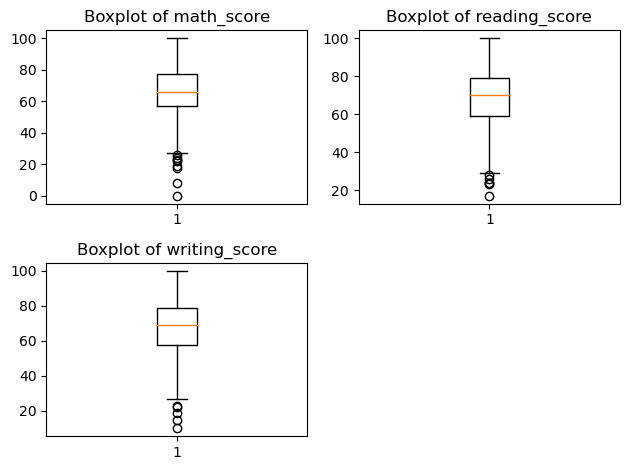

In [10]:
def Outliers():
    for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
        plt.subplot(2,2,i+1)
        plt.boxplot(df1[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
Outliers()

In [26]:
numeric_cols=df1.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    df1 = df1[(df1[col]>=lower)&(df1[col]<=upper)]
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_minmax,math_score_zscore
0,female,group B,bachelor's degree,standard,NaN,72,72,74,0.616438,0.370131
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.160831
2,female,group B,master's degree,standard,NaN,90,95,93,0.863014,1.625930
3,male,group A,associate's degree,free/reduced,NaN,47,57,44,0.273973,-1.374034
4,male,group C,some college,standard,NaN,76,78,75,0.671233,0.649197
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.835616,1.486397
996,male,group C,high school,free/reduced,NaN,62,55,55,0.479452,-0.327535
997,female,group C,high school,free/reduced,completed,59,71,65,0.438356,-0.536835
998,female,group D,some college,standard,completed,68,78,77,0.561644,0.091065


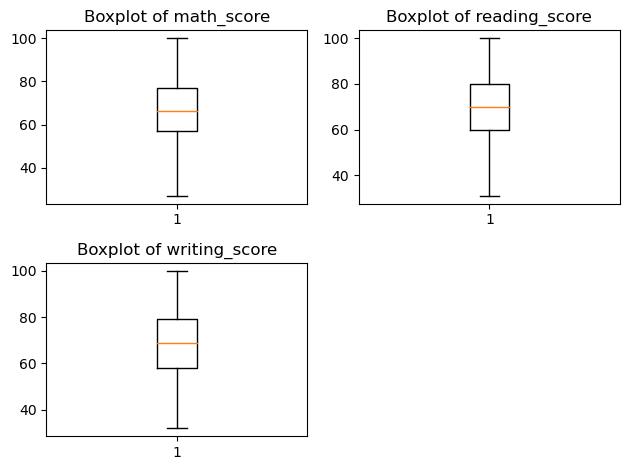

In [12]:
Outliers()

In [27]:
df1['math_score'].skew()

0.0005370702739725357

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create scalers
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Apply Min-Max Scaling
df1['math_score_minmax'] = minmax_scaler.fit_transform(df1[['math_score']])


# Display first few rows
df1


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_minmax
0,female,group B,bachelor's degree,standard,NaN,72,72,74,0.616438
1,female,group C,some college,standard,completed,69,90,88,0.575342
2,female,group B,master's degree,standard,NaN,90,95,93,0.863014
3,male,group A,associate's degree,free/reduced,NaN,47,57,44,0.273973
4,male,group C,some college,standard,NaN,76,78,75,0.671233
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.835616
996,male,group C,high school,free/reduced,NaN,62,55,55,0.479452
997,female,group C,high school,free/reduced,completed,59,71,65,0.438356
998,female,group D,some college,standard,completed,68,78,77,0.561644


In [22]:
# Apply Z-score Normalization
df1['math_score_zscore'] = zscore_scaler.fit_transform(df1[['math_score']])
df1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_minmax,math_score_zscore
0,female,group B,bachelor's degree,standard,NaN,72,72,74,0.616438,0.370131
1,female,group C,some college,standard,completed,69,90,88,0.575342,0.160831
2,female,group B,master's degree,standard,NaN,90,95,93,0.863014,1.625930
3,male,group A,associate's degree,free/reduced,NaN,47,57,44,0.273973,-1.374034
4,male,group C,some college,standard,NaN,76,78,75,0.671233,0.649197
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0.835616,1.486397
996,male,group C,high school,free/reduced,NaN,62,55,55,0.479452,-0.327535
997,female,group C,high school,free/reduced,completed,59,71,65,0.438356,-0.536835
998,female,group D,some college,standard,completed,68,78,77,0.561644,0.091065


In [12]:
df1.describe()

,math score,reading score,writing score
count,986.000000,986.000000,986.000000
mean,66.694726,69.723124,68.648073
std,14.340780,13.910716,14.427092
min,27.000000,31.000000,32.000000
25%,57.000000,60.000000,58.000000
50%,66.500000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


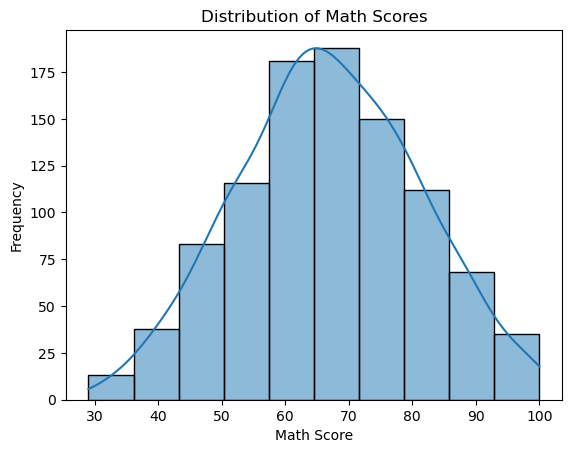

In [31]:
sns.histplot(df1['math_score'], bins=10, kde=True)  # `kde=True` adds a smooth density curve
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')
plt.show()

<Axes: xlabel='math_score', ylabel='Density'>

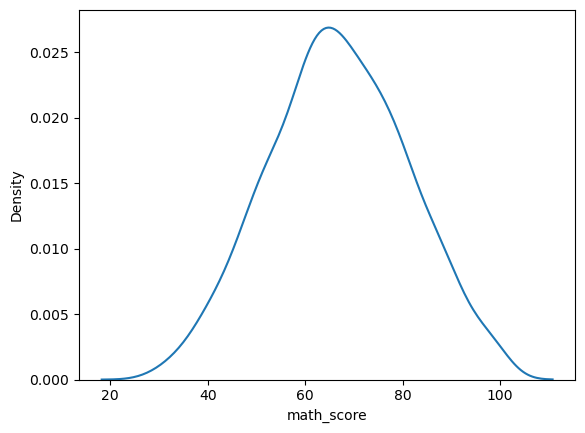

In [32]:
sns.kdeplot(df1['math_score'])

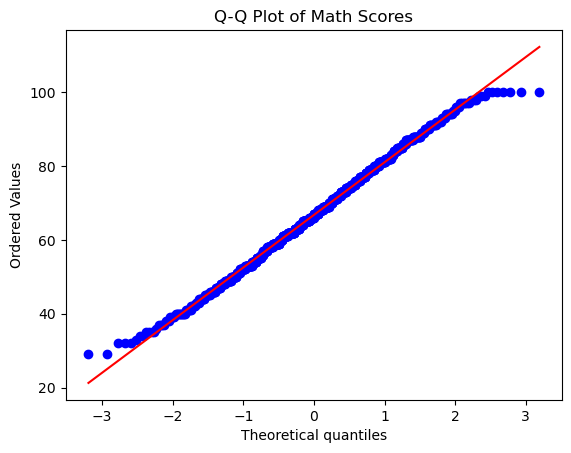

In [33]:
import scipy.stats as stats

stats.probplot(df1['math_score'], dist="norm", plot=plt)

plt.title("Q-Q Plot of Math Scores")
plt.show()
